Simulazione del passaggio di fotoni attraverso un materiale.
-----------------------------------------------------------

Usiamo l'attenuazione esponenziale di un fascio di fotoni e la sezione d'urto di Thomson per descrivere lo scattering di un fotone su un elettrone.<BR>
Da
    $$ N(z) = N_0\,e^{-\frac{z}{\lambda}}$$
si ricava che il numero di fotoni per unità di lunghezza che interagiscono fra $z_0$ e $z_0 +\Delta$ è
     $$ \lim_{\Delta\rightarrow 0} \frac{N(z_0)-N(z_0+\Delta)}{\Delta} = \frac{d\,N}{d\,z} {\bigg \vert}_{z_0}.$$
Di conseguenza, la densità di probabilità che un fotone interagisca nel punto di coordinata $x$
nel materiale è
    $$P(z) = \frac{1}{\lambda}\,e^{-\frac{z}{\lambda}}.$$
Un valore ragionevole per fotoni di 100 keV in un materiale di densità 1.8 $g/cm^3$ (osso) è $\lambda = 2 \,cm$.<BR>
La densità di probabilità che un fotone che si propaga lungo l'asse $z$ sia deflesso in una direzione caratterizzata dagli angoli $\theta,\,\phi$ è data da $$Q(\cos\theta,\phi) = \frac{3}{16\,\pi}\,(1+\cos^2\theta).$$
    <P>
Se il materiale si estende per 10 $cm\,=\,5\,\lambda$, qual'è la probabilità che un fotone fuoriesca dalla
        lastra con un angolo $\theta_f$? Quale frazioni dei fotoni iniziali passerà la lastra?

Si procede come segue:<BR>

1) Inizialmente il fotone si trova nel punto $X_0\,=\,(x,y,z)\,=\,(0,0,0)$ e si propaga in direzione $z$<BR>
2) generiamo una distanza $d_0$ usando la distribuzione $N(z)$<BR>
   
Assumiamo che, alla prima interazione, il fotone si trovi nel punto $X_1\,=\,(0,0,d_0)$.
    
3) generiamo dei valori $d1,\,\cos\theta_1,\,\phi_1$ secondo le distribuzion1 $N(z),\,Q(\cos\theta,\phi)$.
    Il fotone si sposta nel punto $X_2\,=\,X_1 + d1*(\sin\theta\,\cos\phi,\sin\theta\,\sin\phi, \cos\theta)$.<BR>
        

4) Ripetiamo la procedura partendo dai nuovi valori: generiamo $d_2,\cos\theta_2,\phi_2$; calcoliamo il punto 
    $X_2\,=\,(x_2,y_2,y_2)$ in cui il fotone avrà la terza interazione.
    
5) Se $y_2 > 10\,cm$ il fotone sarà uscito dalla lastra. Ne calcolo l'angolo  $\theta_f$ e lo salvo in un file.<BR> &nbsp;&nbsp;&nbsp;&nbsp; Se $y_2 < 10\,cm$ sottopongo il fotone ad una ulteriore interazione.
   


#### Una figura vale più di mille parole:

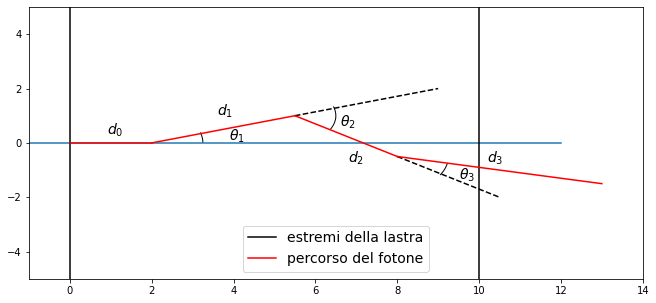

In [8]:
import matplotlib.pyplot as plt
from matplotlib import patches

fig, ax = plt.subplots(figsize=(11,5))
ax.set_xlim(-1,14)
ax.set_ylim(-5,5)
ax.plot([-1,12],[0,0])
ax.plot([0,0],[-5,5],c='0',label='estremi della lastra')
ax.plot([10,10],[-5,5],c='0')

ax.plot([0,2],[0,0],c='r',label='percorso del fotone')
arc1 = patches.Arc((2.,0),2.5,2.5,theta1=0.,theta2=18.,color='0')
ax.add_patch(arc1);

ax.plot([2.,5.5],[0,1],c='r')
ax.plot([5.5,9],[1,2],linestyle='--',c='0')
arc2 = patches.Arc((5.5,1),2,2,angle=20.,theta1=-50.,theta2=0.,color='0')
ax.add_patch(arc2)

ax.plot([5.5,8.],[1.,-0.5],c='r')
ax.plot([8.,10.5],[-0.5,-2.0],linestyle='--',color='0')

ax.plot([8.,13],[-0.5,-1.5],c='r')
arc3 = patches.Arc((8.,-0.5),2.5,2.5,angle=-33.,theta1=0.,theta2=22.,color='0')
ax.add_patch(arc3);

plt.text(0.9, .3, r'$d_0$', {'color': 'k', 'fontsize': 14})
plt.text(3.6, 1., r'$d_1$', {'color': 'k', 'fontsize': 14})
plt.text(6.8, -0.7, r'$d_2$', {'color': 'k', 'fontsize': 14})
plt.text(10.2, -0.7, r'$d_3$', {'color': 'k', 'fontsize': 14})

plt.text(3.9, 0.11, r'$\theta_1$', {'color': 'k', 'fontsize': 14})
plt.text(6.6, 0.6, r'$\theta_2$', {'color': 'k', 'fontsize': 14})
plt.text(9.5, -1.35, r'$\theta_3$', {'color': 'k', 'fontsize': 14})
ax.legend( fontsize= 14);

In [1]:
import numpy as np

def new_step(beta):
    '''
    Generates randomly a distance and two angles:
    beta is the parameter in P(d)=exp(-d/beta)/beta;
    the distribution in cos(theta) is f=3/8*(1+cos(theta)**2));
    the distribution for phi is uniform in (0,2*pi).
    '''
    d=np.array([0,0,np.random.exponential(beta)])
    ctheta=generate_f(f_Thomson,-1,1,0.75)
    phi=np.random.uniform(0,2*np.pi)
    return d,ctheta,phi


def generate_f(f,a,b,max):
    '''
    Generate random points distributed according to an input distribution
    Input:
    f: the probability distribution
    a,b: extrema of the range for the desired random number
    max: a real number such that f(x) < max for each x
    Returns:
    ranval: random number
    '''
    not_found=True
    while not_found:
        x=np.random.uniform(a,b)
        y=np.random.uniform(0,max)
        if f(x)>y:
            not_found=False
    
    return x
    
def f_Thomson(x):
    val=3./8.*(1+x**2)
    
    return val    

def Rx_M(c):
    """
    Rotation matrix of an angle defined by cos(theta) around the x-axis
    """
    # Trusting -1 =< c =< 1
    s = np.sqrt(1.-c**2)
    R = np.array(
        [[1, 0, 0], 
         [0, c, -s], 
         [0, s, c]]
    )
    return R

def Rz_M(phi):
    """
    Rotation matrix of an angle phi around the z-axis
    """
    c = np.cos(phi)
    s = np.sin(phi)
    R = np.array(
        [[c, -s, 0], 
         [s, c, 0],
         [0, 0, 1]]
    )
    return R

def R_M(c,phi):
    return np.dot(Rz_M(phi),Rx_M(c))


#### Seguiamo un fotone per qualche urto

Teniamo in memoria gli ultimi due punti per poter calcolare la direzione del fotone.

In [11]:
beta=2. # distances are mesured in cm
d=np.random.exponential(beta)
Xpos=np.array([0,0,d])
Xpos_old=np.array([0,0,0])
print(Xpos)

[0.         0.         1.91913244]


In [12]:
# interaction 1
d,ctheta,phi=new_step(beta)
#print(d,ctheta,phi)
mat=R_M(ctheta,phi)
print(mat)
delta_X=np.dot(mat,d)
#print(delta_X)
Xpos_old=Xpos
Xpos+=delta_X
print(Xpos)

[[-0.49313338  0.40382697  0.77054737]
 [ 0.86995372  0.22890937  0.43678488]
 [ 0.          0.88573375 -0.46419363]]
[0.65851646 0.37328014 1.52242854]


In [13]:
# interaction 2
d,ctheta,phi=new_step(beta)
#print(d,ctheta,phi)
mat=np.matmul(R_M(ctheta,phi),mat) # accumulate rotations
#print(mat)
delta_X=np.dot(mat,d)
#print(delta_X)
Xpos_old=Xpos
Xpos+=delta_X
print(Xpos)

[0.91367852 0.73011629 1.74969682]


In [14]:
# interaction 3
d,ctheta,phi=new_step(beta)
#print(d,ctheta,phi)
mat=np.matmul(R_M(ctheta,phi),mat) # accumulate rotations
#print(mat)
delta_X=np.dot(mat,d)
#print(delta_X)
Xpos_old=Xpos
Xpos+=delta_X
print(Xpos)

[3.41810947 0.58073309 2.3380425 ]


In [15]:
# interaction 4
d,ctheta,phi=new_step(beta)
#print(d,ctheta,phi)
mat=np.matmul(R_M(ctheta,phi),mat) # accumulate rotations
#print(mat)
delta_X=np.dot(mat,d)
#print(delta_X)
Xpos_old=Xpos
Xpos+=delta_X
print(Xpos)

[3.85432507 0.03890282 2.46219617]


Programma di simulazione
------------------------

In [46]:
import matplotlib.pyplot as plt

def MC_gamma(ngamma,zmax,lam,nbin):
    
    '''
    Input:
    ngamma: numero di fotoni da simulare.
    zmax: spessore della lastra.
    lam: lunghezza caratteristica del materiale. Entra nella legge di decadimento del fascio.
    nbin: numero di bin della distribuzione in cos(theta) dei fotoni che escono dalla lastra.

    Output:
    dist: distribuzione in cos(theta) dei fotoni che escono dalla lastra.
    nout: numero di fotoni che escono dalla lastra.
    '''
    
# Inizializzazione
    dist=[]
    nout=0
#    print('delc:',delc)
# Plot di controllo
    dist_c=[]
    dist_phi=[]
    dist_dz=[]
    dist_X1=[]
    
    for i in range(ngamma): 
# primo punto
        mat=np.identity(3)
        d=np.random.exponential(lam)
        Xpos=np.array([0,0,d])
        Xpos_old=np.array([0,0,0])
        delta_X=Xpos     # Necessario perchè uso delta_X per calcolare il coseno del fotone finale
#        print(Xpos)
# Interazioni successive. Stop quando il fotone esce dalla lastra.    
        while 0 < Xpos[2] < zmax:
            d,ctheta,phi=new_step(lam)
# Plot di controllo
            dist_dz.append(d[2])
            dist_c.append(ctheta)
            dist_phi.append(phi)
            
            mat=np.dot(R_M(ctheta,phi),mat) # accumulate rotations
            delta_X=np.dot(mat,d)
            Xpos_old=np.copy(Xpos)
# Xpos_old=Xpos non funzionerebbe. Perchè?
# Neanche  Xpos_old=Xpos[:] che invece va bene per le liste.
            Xpos+=delta_X
#            print(Xpos)
# Plot di controllo
            dist_X1.append(Xpos[1])

        if Xpos[2] > zmax:
            nout+=1
            ct= delta_X[2]/np.sqrt(np.sum(delta_X*delta_X))
            dist.append(ct)

# Plot di controllo
# cos(theta)
    nb =20
    xrange=(-1,1)
    fig, ax = plt.subplots()
    ax.set_title('Distribuzione di cos(theta) generato')
    ax.set_xlabel('cos(theta)')
    ax.set_ylabel('Numero eventi')
    nevent, bins, patches = ax.hist(dist_c, nb, range=xrange) 
# phi
    nb =20
    xrange=(0,2.*np.pi)
    fig, ax = plt.subplots()
    ax.set_title('Distribuzione di phi generato')
    ax.set_xlabel('phi')
    ax.set_ylabel('Numero eventi')
    nevent, bins, patches = ax.hist(dist_phi, nb, range=xrange) 
# d[2]
    nb =20
    xrange=(0,10)
    fig, ax = plt.subplots()
    ax.set_yscale('log')
    ax.set_title('Distribuzione di d(z)')
    ax.set_xlabel('d(z)')
    ax.set_ylabel('Numero eventi')
    nevent, bins, patches = ax.hist(dist_dz, nb, range=xrange)
# X[1]
    nb =20
    xrange=(-10,10)
    fig, ax = plt.subplots()
    ax.set_title('Distribuzione di Xpos(y)')
    ax.set_xlabel('Xpos(y)')
    ax.set_ylabel('Numero eventi')
    nevent, bins, patches = ax.hist(dist_X1, nb, range=xrange)
    
    return nout,dist

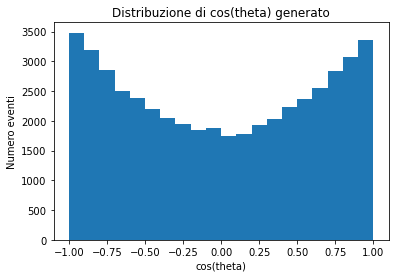

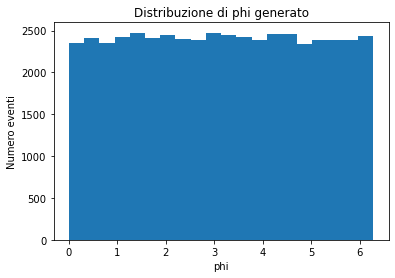

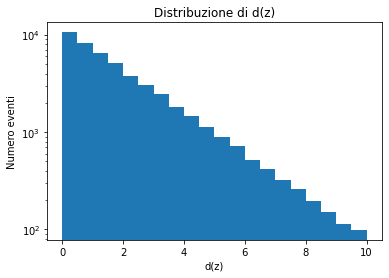

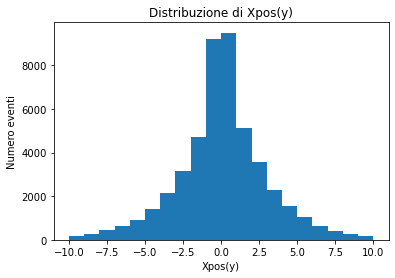

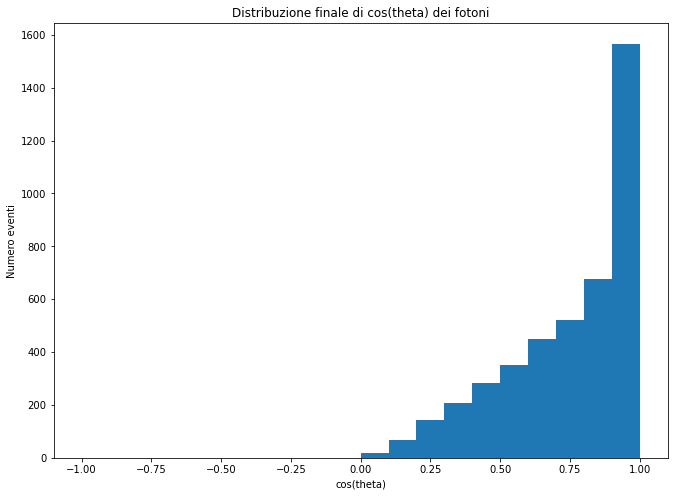

In [47]:
ngamma=10000
zmax=5
lam=2
nbin=20

nout,dist=MC_gamma(ngamma,zmax,lam,nbin)

# Plot
nb =20
xrange=(-1,1)
fig, ax = plt.subplots(figsize=(11,8))
ax.set_title('Distribuzione finale di cos(theta) dei fotoni')
ax.set_xlabel('cos(theta)')
ax.set_ylabel('Numero eventi')
nevent, bins, patches = ax.hist(dist, nb, range=xrange) 
